# Proyecto Suplementación

El objetivo de este proyecto es la creación de un software que permita optimizar la estrategia de suplementación de manera personalizada para cualquier persona, basada en su fenotipo, genotipo y contenido hemático.

**Pasos a seguir**

1. Análisis de los datos:
    - Definición de las preguntas generales a responder con las bases de datos.
    - Definición de las principales variables a comparar.
    - Buscar correlaciones entre variables.
        - Definir funciones de agrupación
        - Definir filtros de datos
        - Contar por ocurrencia

2. 

## Análisis de los datos

Suposiciones:
No importa el nombre del paciente, ni sus datos personales (dirección, contacto, etc...) para efectos de este análisis.

In [2]:
import pandas as pd
import numpy as np

In [3]:
datos = pd.read_csv('.\Datos_Suplementación.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Bren\AppData\Local\Temp\ipykernel_696\1426819495.py:1: SyntaxWarning: invalid escape sequence '\D'
  datos = pd.read_csv('.\Datos_Suplementación.csv')


In [4]:
datos

,Edad,Sexo,Nacimiento,Ocupacion,Salud\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t,Comidas,Com_Casa,Com_Fuera,Hr_des,Hr_com,...,Mastografia\t\t\t\t\t\t\t\t\t,Frec_mastografia\t\t\t\t\t\t\t\t,Papanicolaou,Frec_papanicolau\t\t\t\t\t\t\t\t\t,Anticonceptivos\t\t\t\t\t\t\t\t,Cuales_anticonceptivos\t\t\t\t\t\t\t,Terapia_hormonal\t\t\t\t\t\t\t\t,Cual_terapia_hormonal\t\t\t\t\t\t\t,Extra_info,Unnamed: 514
0,42.0,Femenino,Berna,Empleado (a),"Tengo el metabolismo lento, estrés, ansiedad. ...",3.0,2,1,11:00:00 a.m.,3:00:00 a.m.,...,Sí,2,Sí,1,No,NaN,No,NaN,NaN,NaN
1,34.0,Femenino,"Cabo San Lucas, Los Cabos, B. C. S.",Empleado (a),Tengo ansiedad y quiero una condición saludable,3.0,1,1,10:00:00 a.m.,5:00:00 p.m.,...,No,NaN,Sí,cada 6 meses,No,NaN,No,NaN,ayuno intermitente,NaN
2,32.0,Masculino,Campeche,Empleado (a),Tengo problemas gastrointestinales frecuentes ...,2.0,1,1,12:00:00 p.m.,8:00:00 p.m.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45.0,Femenino,CDMX,Empresario (a),Resistencia a la insulina,4.0,4,Casi no… esporádicamente,10:30:00 a.m.,2:30:00 p.m.,...,Sí,Cada Dos años,Sí,Cada año,No,NaN,Sí,Testosterona,Viajo constantemente,NaN
4,41.0,Femenino,CDMX,Empleado (a),Tengo sobrepeso y quiero un peso saludable,3.0,3,0,9:00:00 a.m.,3:00:00 a.m.,...,Sí,cada año,Sí,cada año,Sí,NaN,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obtenemos todos los tipos de datos que se preguntan en el cuestionario.

In [5]:
#imprime los nombres de todas las columnas en forma de lista
tipos_datos= datos.columns.tolist()
tipos_datos

['Edad',
 'Sexo',
 'Nacimiento',
 'Ocupacion',
 'Salud\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 'Comidas',
 'Com_Casa',
 'Com_Fuera',
 'Hr_des',
 'Hr_com',
 'Hr_cen\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 'Apetito',
 'Alergia',
 'Alergia_cual',
 'Suplemento\t',
 'En caso afirmativo por favor especifique',
 'Sal',
 'Dieta',
 'Frutas',
 'Frec_frutas',
 'Verduras',
 'Frec_verduras',
 'Cereales',
 'Frec_cereales',
 'Tuberculos',
 'Frec_tuberculos',
 'Animal',
 'Frec_animal',
 'Lacteos',
 'Frec_lac',
 'Sust_lacteos',
 'Frec_sust_lac',
 'Grasas_veg',
 'Frec_grasas_veg',
 'Fam_sana',
 'Trab_sano',
 'Fam_dieta',
 'Trab_dieta',
 'Sano_equiv_dieta',
 'Cantidad_agua',
 'Cantidad_cafe',
 'Cafe_azucar',
 'Cant_azucar_cafe',
 'Cantidad_cafe.1',
 'Te_azucar',
 'Cant_azucar_te',
 'Sust_azucar',
 'Cant_sust_azucar',
 'Deporte',
 'Tiempo_deporte',
 'Comida_pre_deporte',
 'Cual_comida_pre_deporte',
 'Mareos_deporte',
 'Malestar_deporte',
 'Tipo_malestar_deporte',
 'Hidrat_deporte',
 'Tipo_hidrat_deporte',
 'Fuerza'

In [6]:
len(tipos_datos)

515

El número total de tipos de datos son 515.

Se va a dividir por especialidades de investigación para tener un mejor manejo de datos.

1. Datos generales
2. Hábitos
3. Comidas
4.
5.
6.
7.
8.
9.
10.
11.
12.
13.
14.
15.

**1. Datos generales**

In [7]:
datos_gen = []

for i in range(5):
    datos_gen.append(tipos_datos[i])

datos_gen

['Edad',
 'Sexo',
 'Nacimiento',
 'Ocupacion',
 'Salud\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t']

In [8]:
df_gen = datos[datos_gen]

**2. Habitos**

In [9]:
datos_habitos = []

for i in range(5,12):
    datos_habitos.append(tipos_datos[i])

datos_habitos

['Comidas',
 'Com_Casa',
 'Com_Fuera',
 'Hr_des',
 'Hr_com',
 'Hr_cen\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 'Apetito']

In [10]:
df_habitos = datos[datos_habitos]

**3. Comidas**

In [11]:
datos_comidas = []

for i in range(12,48):
    datos_comidas.append(tipos_datos[i])

datos_comidas

['Alergia',
 'Alergia_cual',
 'Suplemento\t',
 'En caso afirmativo por favor especifique',
 'Sal',
 'Dieta',
 'Frutas',
 'Frec_frutas',
 'Verduras',
 'Frec_verduras',
 'Cereales',
 'Frec_cereales',
 'Tuberculos',
 'Frec_tuberculos',
 'Animal',
 'Frec_animal',
 'Lacteos',
 'Frec_lac',
 'Sust_lacteos',
 'Frec_sust_lac',
 'Grasas_veg',
 'Frec_grasas_veg',
 'Fam_sana',
 'Trab_sano',
 'Fam_dieta',
 'Trab_dieta',
 'Sano_equiv_dieta',
 'Cantidad_agua',
 'Cantidad_cafe',
 'Cafe_azucar',
 'Cant_azucar_cafe',
 'Cantidad_cafe.1',
 'Te_azucar',
 'Cant_azucar_te',
 'Sust_azucar',
 'Cant_sust_azucar']

In [12]:
df_comidas = datos[datos_comidas]

**Deporte**

In [13]:
datos_deporte = []

for i in range(48,60):
    datos_deporte.append(tipos_datos[i])

datos_deporte

['Deporte',
 'Tiempo_deporte',
 'Comida_pre_deporte',
 'Cual_comida_pre_deporte',
 'Mareos_deporte',
 'Malestar_deporte',
 'Tipo_malestar_deporte',
 'Hidrat_deporte',
 'Tipo_hidrat_deporte',
 'Fuerza',
 'Lesiones',
 'Tipo_lesiones']

**Sueño**

In [14]:
datos_sueno = []

for i in range(60,68):
    datos_sueno.append(tipos_datos[i])

datos_sueno

['Dormir_bien',
 'Hr_dormir',
 'Siesta',
 'Hr_siesta',
 'Menor_irrit_dormir',
 'Ronca',
 'Pesadillas',
 'Sonambulo']

**Salud**

In [15]:
datos_salud = []

for i in range(68,81):
    datos_salud.append(tipos_datos[i])

datos_salud

['Alergia_med',
 'Tipo_alergia_med',
 'Medicamento',
 'Cual_medicamento',
 'Suplemento',
 'Cual_suplemento',
 'Fuma',
 'Inicio_fuma',
 'Cant_fuma',
 'Alcohol',
 'Tipo_alcohol',
 'Frec_alcohol',
 'Mezcladores_alcohol']

**Enfermedades**

In [16]:
datos_enf = []

for i in range(81,174):
    datos_enf.append(tipos_datos[i])

datos_enf

['Cancer',
 'Tipo_cancer',
 'Inicio_cancer',
 'Fin_cancer',
 'Diabetes',
 'Inicio_diabetes',
 'Hipertension',
 'Inicio_hipertension',
 'Acc_cerebv',
 'Inicio_acc_cerebv',
 'Infarto',
 'Inicio_infarto',
 'Colesterol_LDL',
 'Inicio_colesterol_LDL',
 'Fin_colesterol_LDL',
 'Trigliceridos',
 'Inicio_trigliceridos',
 'Fin_trigliceridos',
 'Hipotiroidismo',
 'Inicio_hipotiroidismo',
 'Hipertiroidismo',
 'Inicio_hipertiroidismo',
 'Obesidad',
 'Inicio_obesidad',
 'Fin_obesidad',
 'Migrana',
 'Inicio_migrana',
 'Fin_migrana',
 'Dolor_cabeza\t\t\t\t\t\t\t\t\t',
 'Inicio_dolor_cabeza',
 'Fin_dolor_cabeza',
 'Ansiedad',
 'Inicio_ansiedad',
 'Fin_ansiedad',
 'Depresion',
 'Inicio_depresion',
 'Fin_depresion',
 'Epilepsia',
 'Inicio_epilepsia',
 'Fin_epilepsia',
 'Alzheimer',
 'Inicio_alzheimer',
 'Demencia',
 'Inicio_demecia',
 'Rinon',
 'Inicio_rinon',
 'Fin_rinon',
 'Higado',
 'Inicio_higado',
 'Fin_higado',
 'Vesicula',
 'Inicio_vesicula',
 'Fin_vesicula',
 'Pancreas',
 'Inicio_pancreas',
 'Fin

**Padecimientos**

In [17]:
datos_ = []

for i in range(174,209):
    datos_.append(tipos_datos[i])

datos_

['Cirugia',
 'Tipo_cirugia',
 'Inicio_cirugia',
 'Fractura',
 'Tipo_fractura',
 'Inicio_fractura',
 'Infeccion',
 'Tipo_infeccion',
 'Inicio_infeccion',
 'Frec_infeccion',
 'Otro_padecimiento',
 'Taquicardia',
 'Inicio_taquicardia',
 'Frec_taquicardia',
 'Ardor_extrem',
 'Inicio_ardor_extrem',
 'Frec_ardor_extrem',
 'Adorm_extrem',
 'Inicio_ardor_extrem.1',
 'Frec_ardor_extrem.1',
 'Ret_liq',
 'Inicio_ret_liq',
 'Frec_ret_liq',
 'Hinchazon',
 'Parte_hinchazon',
 'Inicio_hinchazon',
 'Frec_hinchazon',
 'Hematoma',
 'Parte_hematoma',
 'Inicio_hematoma',
 'Frec_hematoma',
 'Verrugas',
 'Parte_verrugas',
 'Inicio_verrugas',
 'Frec_verrugas']

**Estomago**

In [18]:
datos_estom = []

for i in range(209,263):
    datos_estom.append(tipos_datos[i])

datos_estom

['Mal_aliento',
 'Inicio_mal_aliento',
 'Frec_mal_aliento',
 'Ardor_estom',
 'Inicio_ardor_estom',
 'Frec_ardor_estom',
 'Vacio_estom',
 'Inicio_vacio_estom',
 'Frec_vacio_estom',
 'Saciedad',
 'Inicio_saciedad',
 'Frec_saciedad',
 'Acidez_estom',
 'Inicio_acidez_estom',
 'Frec_acidez_estom',
 'Reflujo',
 'Inicio_reflujo',
 'Frec_reflujo',
 'Ercutos',
 'Inicio_eructos',
 'Frec_eructos',
 'Dig_lenta',
 'Inicio_dig_lenta',
 'Fre_dig_lenta',
 'Nauseas',
 'Inicio_nauseas',
 'Frec_nauseas',
 'Vomito',
 'Inicio_vomito',
 'Frec_vomito',
 'Gases',
 'Inicio_gases',
 'Frec_gases',
 'Infl_abd',
 'Inicio_inlf_abd',
 'Frec_infl_abd',
 'Abd_prom',
 'Inicio_abd_prom',
 'Frec_abd_pro',
 'Diarrea',
 'Inicio_diarrea',
 'Frec_diarrea',
 'Estrenimiento',
 'Inicio_estrenimiento',
 'Frec_estrenimiento',
 'Heces_sangre',
 'Inicio_heces_sangre',
 'Frec_heces_sangre',
 'Dolor_evac',
 'Inicio_dolor_evac',
 'Frec_dolor_evac',
 'Hemorragia',
 'Inicio_hemorragia',
 'Frec_hemorragia']

**Vision**

In [19]:
datos_vis = []

for i in range(263,269):
    datos_vis.append(tipos_datos[i])

datos_vis

['Menor_vision',
 'Inicio_menor_vision',
 'Frec_menor_vision',
 'Ardod_ojos',
 'Inicio_ardor_ojos',
 'Frec_ardor_ojos']

**Oidos**

In [20]:
datos_oid = []

for i in range(269,275):
    datos_oid.append(tipos_datos[i])

datos_oid

['Zumb_oidos',
 'Inicio_zumb_oidos',
 'Frec_zumb_oidos',
 'Infl_oidos',
 'Inicio_infl_oidos',
 'Frec_infl_oidos']

**Cuerpo**

In [21]:
datos_cuerpo = []

for i in range(275,301):
    datos_cuerpo.append(tipos_datos[i])

datos_cuerpo

['Dolor_artic',
 'Inicio_dolor_artic',
 'Frec_dolor_artic',
 'Dolor_musc',
 'Inicio_dolor_musc',
 'Frec_dolor_musc',
 'Calambres',
 'Inicio_calambres',
 'Frec_calambres',
 'Entum_extrem',
 'Parte_entum_extrem',
 'Inicio_entum_extrem',
 'Frec_entum_extrem',
 'Hormigueo',
 'Parte_hormigueo',
 'Inicio_hormiguep',
 'Frec_hormigueo',
 'Cabello_seco',
 'Inicio_cabello_seco',
 'Frec_cabello_seco',
 'Caida_cabello',
 'Inicio_caida_cabello',
 'Frec_caida_cabello',
 'Unas_quebr',
 'Inicio_unas_quebr',
 'Frec_unas_quebr']

**Respiratorio**

In [22]:
datos_resp = []

for i in range(301,319):
    datos_resp.append(tipos_datos[i])

datos_resp

['Tos',
 'Inicio_tos',
 'Frec_tos',
 'Reseq_gargan',
 'Inicio_reseq_gargan',
 'Frec_resq_gargan',
 'Reseq_nariz',
 'Inicio_reseq_nariz',
 'Frec_reseq_nariz',
 'Comezon_nariz',
 'Inicio_comezon_nariz',
 'Frec_comezon_nariz',
 'Flujo_nasal',
 'Inicio_flujo_nasal',
 'Frec_flujo_nasal',
 'Sed_intensa',
 'Inicio_sed_intensa',
 'Frec_sed_intensa']

**Neuronal**

In [23]:
datos_neu = []

for i in range(319,345):
    datos_neu.append(tipos_datos[i])

datos_neu

['Desmayos',
 'Inicio_desmayos',
 'Frec_desmayos',
 'Perd_conciencia',
 'Inicio_perd_conciencia',
 'Frec_perd_conciencia',
 'Mareos',
 'Inicio_mareos',
 'Frec_mareos',
 'Estres',
 'Inicio_estres',
 'Frec_estres',
 'Fatiga',
 'Inicio_fatiga',
 'Frec_fatiga',
 'Temblorina',
 'Inicio_temblorina',
 'Frec_temblorina',
 'Sudor_ex',
 'Inicio_sudor_ex',
 'Frec_sudor_ex',
 'Tic',
 'Parte_tic',
 'Que_tic',
 'Inicio_tic',
 'Frec_tic']

**Gustos**

In [24]:
datos_gust = []

for i in range(345,351):
    datos_gust.append(tipos_datos[i])

datos_gust

['Fobia', 'Cual_fobia', 'Hobbie', 'Cual_hobbie', 'Frec_hobbie', 'Otro_sintoma']

**Psicologia**

In [25]:
datos_psic = []

for i in range(351,382):
    datos_psic.append(tipos_datos[i])

datos_psic

['Entusiasmo_facil',
 'Tranquilidad_externa',
 'Tranquilidad_interna',
 'Bipolar',
 'Optimismo_a_abatimiento',
 'Humor_igual',
 'Herido_llamado_atencion',
 'Import_critica',
 'Nudo_garganta',
 'Casi_nunca_afecta',
 'Padrisimo_hablar',
 'Serenidad_discusion',
 'Inquieto',
 'Mucho_movimiento',
 'Gesticulacion_habla',
 'Quieto_sin_emocion',
 'Planear',
 'Sueno_despierto',
 'Empezar_tareas_pronto',
 'Prolongar_tareas',
 'Redoble_esfuerzos_dificultades',
 'Desanimo_dificultades',
 'Siempre_ocupado',
 'Tranquilo_termino_deberess',
 'Triste_mas_comida',
 'Inicio_triste_mas_comida',
 'Causa_triste_mas_comida',
 'Evento_triste_mas_comida',
 'Solucion_triste_mas_comida',
 'Tratamiento_triste_mas_comida',
 'Resultados_trat_triste_mas_comida']

**Genetico**

In [26]:
datos_genet = []

for i in range(382,465):
    datos_genet.append(tipos_datos[i])

datos_genet

['Cancer_fam',
 'Tipo_cancer_fam',
 'Parentesco_cancer_fam',
 'Diabetes_fam',
 'Parentesco_diabetes_fam',
 'Hipertension_fam',
 'Parentesco_hipertension_fam',
 'Acc_cerebv_fam\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
 'Parentesco_Acc_cerebv\t_fam',
 'Infarto_fam',
 'Parentesco_Infarto_fam',
 'Colesterol_LDL_fam',
 'Parentesco_Colesterol_LDL_fam',
 'Trigliceridos_fam',
 'Parentesco_Trigliceridos_fam',
 'Hipotiroidismo_fam',
 'Parentesco_Hipotiroidismo_fam',
 'Hipertiroidismo_fam',
 'Parentesco_Hipertiroidismo_fam',
 'Obesidad_fam\t\t\t\t\t',
 'Parentesco_fam',
 'Sobrepeso_fam',
 'Parentesco_sobrepeso_fam',
 'Migrana_fam',
 'Parentesco_migrana_fam',
 'Dolor_cabeza_fam',
 'Parentesco_dolor_cabez_fam',
 'Ansiedad_fam',
 'Parentesco_ansiedad_fam',
 'Depresion_fam',
 'Parentesco:depresion_fam',
 'Epilepsia_fam',
 'Parentesco_fam.1',
 'Alzheimer_fam',
 'Parentesco_alzheimer_fam',
 'Demencia_fam',
 'Parentesco_demensia_fam',
 'Rinon_fam\t\t\t\t\t\t\t',
 'Parentesco_rinon_fam',
 'Higado_fam',
 'Parentes

**Nutricion**

In [27]:
datos_nutri = []

for i in range(465,494):
    datos_nutri.append(tipos_datos[i])

datos_nutri

['Peso_actual',
 'Peso_habitual',
 'Peso_max',
 'Peso_min\t\t\t\t\t\t\t\t',
 'Altura',
 'Talla',
 'IMC',
 'Cuello',
 'Brazo_relax',
 'Brazo_flex',
 'Brazo_contrac',
 'Cintura',
 'Cadera',
 'Abdomen',
 'Muslo_medio',
 'Pierna',
 'ICC',
 'Porc_grasa\t\t\t\t\t\t\t\t\t',
 'Porc_magra\t\t\t\t\t\t\t\t\t',
 'Pliegue_derecho',
 'Pliegue_izquierdo',
 'Tricipital\t\t\t\t\t',
 'Subescapular\t\t\t\t\t',
 'Biceps\t\t\t\t\t',
 'Suprailiaco\t\t\t\t\t',
 'Supraespinal\t\t\t\t\t',
 'Abdominal\t\t\t\t\t',
 'Muslo_anterior\t\t\t\t\t',
 'Pantorilla media\t\t\t\t\t']

**Ginecologia**

In [28]:
datos_gine = []

for i in range(494,513):
    datos_gine.append(tipos_datos[i])

datos_gine

['Primer_mestruacion\t\t\t\t\t\t\t\t\t',
 'Fin_menstruar\t\t\t\t\t\t\t\t',
 'Edad_fin_menstruar',
 'Tipo_ciclo_menstrual\t\t\t\t\t\t',
 'Como_mestruacion\t\t\t\t\t\t\t\t',
 'Embarazo\t\t\t\t\t\t\t\t\t',
 'Primer_embarazo_edad\t\t\t\t\t\t\t\t',
 'Numero_embarazos\t\t\t\t\t\t\t',
 'hijos_vivos\t\t\t\t\t\t\t\t\t',
 'Abortos\t\t\t\t\t\t\t\t',
 'Cuan_abortos\t\t\t\t\t\t\t\t\t',
 'Mastografia\t\t\t\t\t\t\t\t\t',
 'Frec_mastografia\t\t\t\t\t\t\t\t',
 'Papanicolaou',
 'Frec_papanicolau\t\t\t\t\t\t\t\t\t',
 'Anticonceptivos\t\t\t\t\t\t\t\t',
 'Cuales_anticonceptivos\t\t\t\t\t\t\t',
 'Terapia_hormonal\t\t\t\t\t\t\t\t',
 'Cual_terapia_hormonal\t\t\t\t\t\t\t']

### Definición de preguntas generales

**Distribución de muestra por edades y género**

In [31]:
import matplotlib.pyplot as plt

In [36]:
df_gen

,Edad,Sexo,Nacimiento,Ocupacion,Salud\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
0,42.0,Femenino,Berna,Empleado (a),"Tengo el metabolismo lento, estrés, ansiedad. ..."
1,34.0,Femenino,"Cabo San Lucas, Los Cabos, B. C. S.",Empleado (a),Tengo ansiedad y quiero una condición saludable
2,32.0,Masculino,Campeche,Empleado (a),Tengo problemas gastrointestinales frecuentes ...
3,45.0,Femenino,CDMX,Empresario (a),Resistencia a la insulina
4,41.0,Femenino,CDMX,Empleado (a),Tengo sobrepeso y quiero un peso saludable
...,...,...,...,...,...
389,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN,NaN


In [137]:
edades = df_gen['Edad'].value_counts()
sexo = df_gen['Sexo'].value_counts()
ocupacion = df_gen['Ocupacion'].value_counts()


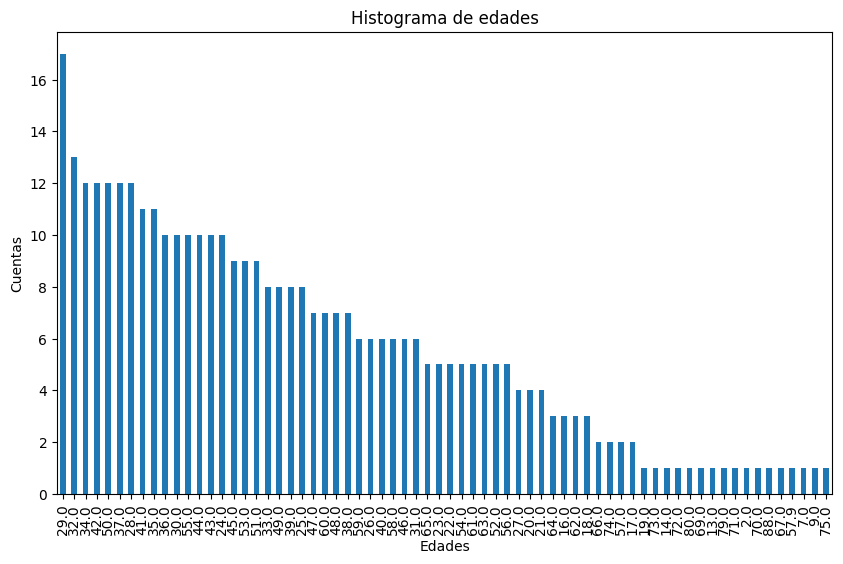

In [32]:
# Plot the histogram
plt.figure(figsize=(10, 6))
edades.plot(kind='bar')
plt.xlabel('Edades')
plt.ylabel('Cuentas')
plt.title(f'Histograma de edades')
plt.show()

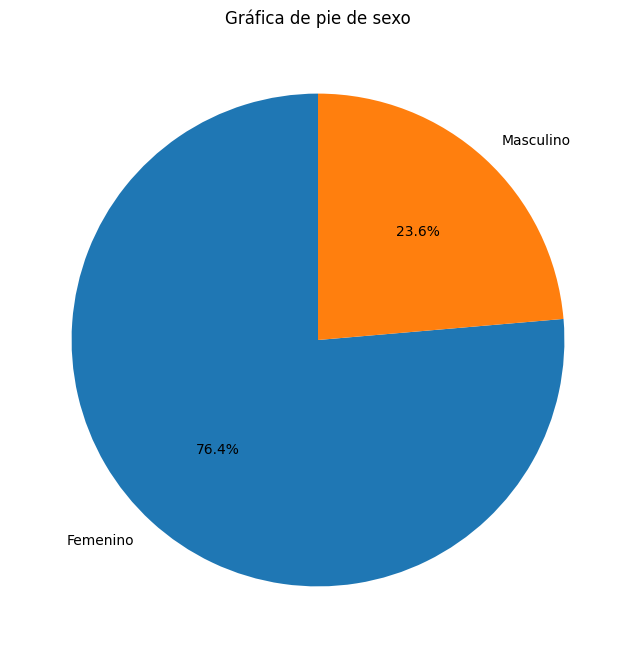

In [35]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  # Hide the y-label
plt.title(f'Gráfica de pie de sexo')
plt.show()

<Axes: xlabel='Ocupacion'>

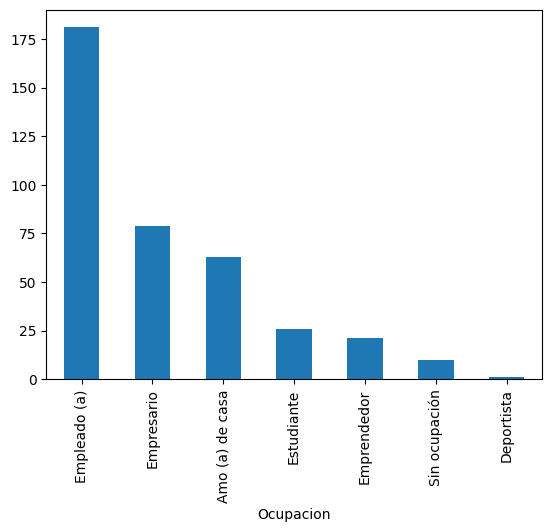

In [135]:
df_gen['Ocupacion'].value_counts().plot(kind='bar')

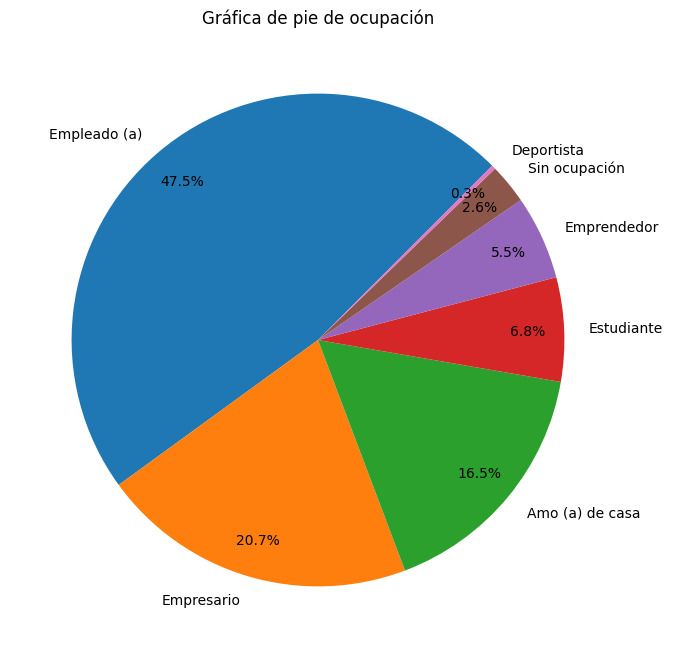

In [146]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
ocupacion.plot(kind='pie', autopct='%1.1f%%', startangle=45, fontsize=10, pctdistance=0.85)
plt.ylabel('')  # Hide the y-label
plt.title(f'Gráfica de pie de ocupación')
plt.show()